In [39]:

#%%
import os
import sys
import json
from argparse import ArgumentParser
import yaml
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt
# personal files
import models
from datasets import MelDataset, vctkDataset, greatbirdDataset


os.chdir('/mnt/work/')
# ------------------------------------------------------------------------
# config loading
data_config_path = "./Animal/configs/greatbird/dataset_greatbird.yaml"

# model path
model_config_path = "./Animal/configs/greatbird/model_greatbird.yaml"
model_path = './Animal/output/greatbird'
#------------------------------------------------------------------------
exp_name = 'VAEbase-greatbird_6-c_80.0_1.0-i_10.0_80.0'
checkpoint = "200000.pth.tar"
#------------------------------------------------------------------------
# exp_name = 'VAEbase-greatbird_4-c_80.0_1.0-i_10.0_20.0'
# checkpoint = "190000.pth.tar"
#------------------------------------------------------------------------
# exp_name = 'VAEbase-greatbird_6-c_80.0_1.0-i_10.0_80.0'
# checkpoint = "190000.pth.tar"

# device
torch.cuda.set_device(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
# ------------------------------------------------------------------------

# dataset vctk
dataset_config = yaml.load(open(data_config_path, "r"), Loader=yaml.FullLoader)
analy_set = greatbirdDataset(dataset_config, subset='test')
# analy_set = greatbirdDataset(dataset_config, subset='val')

analy_loader = DataLoader(analy_set, batch_size=1, shuffle=False)


# model loading
model_config = yaml.load(open(model_config_path, "r"), Loader=yaml.FullLoader)
model_name = model_config['model_name']
model_type = getattr(models, model_name) # model choose
model = model_type(model_config, device).to(device) # model config load

#load model
save_path = os.path.join(model_path, exp_name, 'checkpoint', checkpoint)
ckpt = torch.load(save_path)
model.load_state_dict(ckpt["model"])
model.eval()

# data store
total_z_indi_mu = []
total_z_indi_log_std = []
total_z_indi = []

total_z_con_mu = []
total_z_con_log_std = []
total_z_con = []

total_x_gt = [] # mel
total_x_rec = [] # reconstuct mel
total_cID = []
total_ctID = []

for mel, lenx, indi_mel, cID, cID_type  in tqdm(analy_loader):
        mel = mel.to(device)
        lenx = lenx.to(device)
        indi_mel = indi_mel.to(device)
        
        outputs = model(mel, lenx, indi_mel) 
        
        z_indi_mu = outputs['indi_mu'].detach().cpu().numpy()
        z_indi_log_std = outputs['indi_log_std'].detach().cpu().numpy()
        z_indi = outputs['z_indi'].detach().cpu().numpy() 
        
        z_con_mu = outputs['con_mu'].detach().cpu().numpy() 
        z_con_log_std = outputs['con_log_std'].detach().cpu().numpy() 
        z_con = outputs['z_con'].detach().cpu().numpy() 
        x_rec = outputs['x_rec'].detach().cpu().numpy() 
        
        total_z_indi_mu.append(z_indi_mu)
        total_z_indi_log_std.append(z_indi_log_std)
        total_z_indi.append(z_indi)
        total_z_con_mu.append(z_con_mu)
        total_z_con_log_std.append(z_con_log_std)
        total_z_con.append(z_con)
        
        total_x_gt.append(mel.detach().cpu().numpy())
        total_x_rec.append(x_rec)
        
        # print('cID',cID[0][1:])
        total_cID.append(cID[0])
        total_ctID.append(cID_type[0])
    
unique_elements, counts = np.unique(total_cID, return_counts=True)
times = 0
for element, count in zip(unique_elements, counts):
    times += 1
    print('cID_counts',f"{element}: {count}")
print('times',times)


dataset greatbird loading...


100%|██████████| 9154/9154 [01:51<00:00, 81.77it/s]

cID_counts B101: 20
cID_counts B165: 8
cID_counts B221: 57
cID_counts B39: 34
cID_counts B4: 98
cID_counts B57: 59
cID_counts B67: 18
cID_counts B98: 54
cID_counts C1: 7
cID_counts C10: 25
cID_counts C108: 30
cID_counts C109: 12
cID_counts C12: 3
cID_counts C16: 99
cID_counts C4: 145
cID_counts C47: 236
cID_counts C61A: 144
cID_counts EX10: 18
cID_counts EX19A: 8
cID_counts EX29: 8
cID_counts EX34: 173
cID_counts EX51: 9
cID_counts EX57: 35
cID_counts EX62: 76
cID_counts EX62E: 81
cID_counts EX62F: 136
cID_counts MP12: 296
cID_counts MP29: 24
cID_counts MP41: 132
cID_counts MP42: 557
cID_counts MP50: 40
cID_counts MP55: 261
cID_counts MP57: 21
cID_counts MP61: 485
cID_counts MP64: 271
cID_counts MP65: 114
cID_counts MP76: 496
cID_counts MP78: 249
cID_counts O113: 26
cID_counts O21: 371
cID_counts O27A: 210
cID_counts O36: 284
cID_counts O48: 45
cID_counts O56: 129
cID_counts O6: 63
cID_counts O75D: 293
cID_counts O78: 156
cID_counts O82: 34
cID_counts O93: 45
cID_counts P11: 11
cID_cou

In [40]:
used_label = total_ctID
unique_labels = np.unique(used_label)
unique_labels

array(['B101_0', 'B101_1', 'B101_3', 'B101_4', 'B101_5', 'B165_0',
       'B165_1', 'B221_0', 'B221_1', 'B221_2', 'B221_3', 'B39_0', 'B39_1',
       'B4_0', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B57_0', 'B57_1',
       'B57_2', 'B57_3', 'B57_4', 'B67_0', 'B67_1', 'B67_2', 'B67_3',
       'B98_0', 'B98_1', 'C108_0', 'C108_1', 'C108_2', 'C108_4', 'C109_0',
       'C10_0', 'C10_1', 'C10_3', 'C12_0', 'C16_0', 'C16_2', 'C16_3',
       'C1_0', 'C1_3', 'C47_0', 'C47_1', 'C47_2', 'C47_3', 'C47_4',
       'C47_5', 'C47_6', 'C47_7', 'C47_8', 'C4_0', 'C4_1', 'C4_2', 'C4_3',
       'C61A_0', 'C61A_1', 'C61A_10', 'C61A_2', 'C61A_3', 'C61A_4',
       'C61A_5', 'C61A_6', 'C61A_7', 'C61A_8', 'EX10_0', 'EX10_1',
       'EX10_2', 'EX19A_1', 'EX19A_3', 'EX29_0', 'EX29_1', 'EX29_2',
       'EX34_0', 'EX34_2', 'EX34_3', 'EX34_4', 'EX34_6', 'EX51_0',
       'EX51_1', 'EX57_0', 'EX57_1', 'EX57_2', 'EX57_3', 'EX57_4',
       'EX62E_0', 'EX62E_1', 'EX62E_2', 'EX62E_3', 'EX62E_4', 'EX62F_0',
       'EX62F_1'

In [41]:
from sklearn.manifold import TSNE

# call type
total_z_con_1D = []
for i in total_z_con_mu: # total_z_con; content miu: total_z_con_mu; content var: total_z_con_log_std
    total_z_con_1D.append(i.sum(2))

# tsne
total_z_con_1D = np.array(total_z_con_1D).squeeze()
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 1000)

# print('total_z_con_1D',total_z_con_1D[0])

data_2d_con = tsne.fit_transform(total_z_con_1D) # cnontent


data choose from label (9154, 2)
label choose from label (1, 9154)
unique label choose from label (71,)


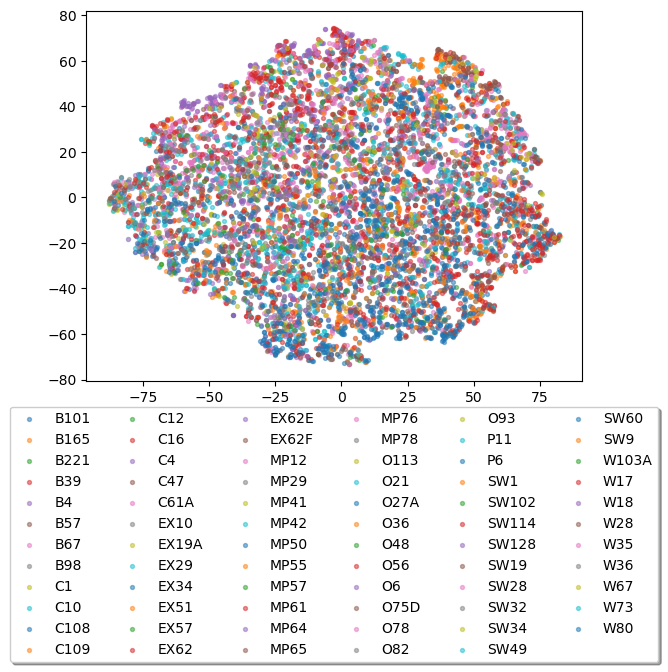

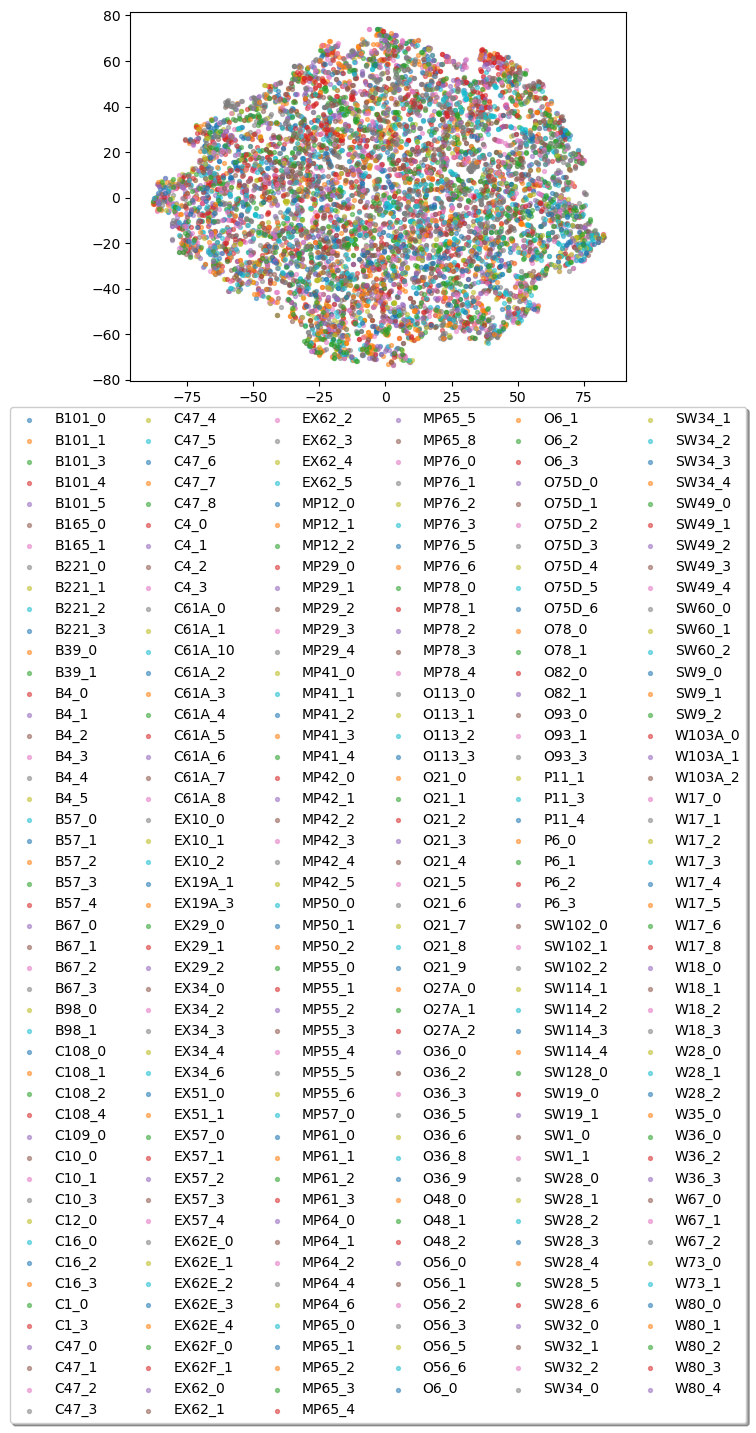

data choose from label (721, 2)
label choose from label (1, 721)
unique label choose from label (5,)


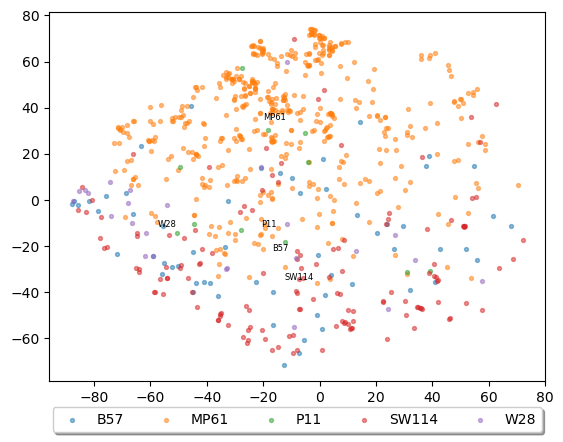

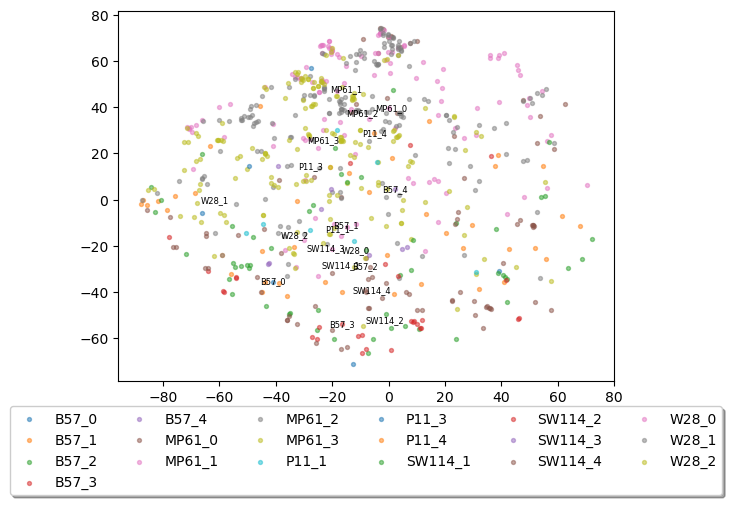

In [42]:



# Get unique labels
# caller
total_cID = np.array(total_cID)
used_label = np.expand_dims(total_cID, axis=0)

# caller_class
total_ctID = np.array(total_ctID)
caller_type_label = np.expand_dims(total_ctID, axis=0)
# ------------------------------------------------------------------------
# use data segment
# ran_data = True
ran_data = False
if ran_data:
    num_samples = 5000
    random.seed(0)
    rand = list(range(len(data_2d_con)))
    samples = random.sample(rand, num_samples)
    data_2d_con_seg = data_2d_con[samples,]
    used_label_seg = used_label[:,samples]
    unique_labels = np.unique(used_label_seg)
else:
    # not random choose data segment
    data_2d_con_seg = data_2d_con
    used_label_seg = used_label
    unique_labels = np.unique(used_label_seg)
    # print(data_2d_con.shape)
    # print(unique_labels.shape)
    # print(unique_labels)


# select data from data label
# random select
# num_label = 5
# num_label = 71


con_text = [False, True]
con_iter = iter(con_text) 

for num_label in [71, 5]: 
    
    random.seed(0)
    rand_label_num = list(range(len(unique_labels)))
    rand_label = random.sample(rand_label_num, num_label)
    used_label_index = unique_labels[rand_label]

    # choose label
    # used_label_index = ['B101', 'B165',  'B221',  'B39',  'B4', 'B57']
    # ['B101' 'B165' 'B221' 'B39' 'B4' 'B57' 'B67' 'B98' 'C1' 'C10' 'C108'
    #  'C109' 'C12' 'C16' 'C4' 'C47' 'C61A' 'EX10' 'EX19A' 'EX29' 'EX34' 'EX51'
    #  'EX57' 'EX62' 'EX62E' 'EX62F' 'MP12' 'MP29' 'MP41' 'MP42' 'MP50' 'MP55'
    #  'MP57' 'MP61' 'MP64' 'MP65' 'MP76' 'MP78' 'O113' 'O21' 'O27A' 'O36' 'O48'
    #  'O56' 'O6' 'O75D' 'O78' 'O82' 'O93' 'P11' 'P6' 'SW1' 'SW102' 'SW114'
    #  'SW128' 'SW19' 'SW28' 'SW32' 'SW34' 'SW49' 'SW60' 'SW9' 'W103A' 'W17'
    #  'W18' 'W28' 'W35' 'W36' 'W67' 'W73' 'W80']

    # mask to selected data label
    mask = np.isin(used_label_seg, used_label_index)
    # print(mask)
    indices = np.where(mask)[1]
    # print(indices)
    data_spk_label = data_2d_con_seg[indices,]
    used_spk_label = used_label_seg[:,indices]
    used_spk_type_label = caller_type_label[:,indices]

    unique_spk_label = np.unique(used_spk_label)
    unique_spk_type_label = np.unique(used_spk_type_label)

    print('data choose from label',data_spk_label.shape)
    # print(data_spk_label)
    print('label choose from label',used_spk_label.shape)
    # print(used_spk_label)
    print('unique label choose from label',unique_spk_label.shape)
    # print(unique_spk_label)

    # paint index
    next_item = next(con_iter)
    
    for label in unique_spk_label:
        label_mask = np.all(used_spk_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    plt.show()


    for label in unique_spk_type_label:
        label_mask = np.all(used_spk_type_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    plt.show()

In [43]:
from sklearn.manifold import TSNE

# total_z_con = 
# caller
total_z_indi = np.array(total_z_indi).squeeze() # indi
total_z_indi_mu = np.array(total_z_indi_mu).squeeze() # individual miu
total_z_indi_log_std = np.array(total_z_indi_log_std).squeeze()
total_indi = np.hstack((total_z_indi_mu, total_z_indi_log_std))

# tsne
tsne = TSNE(n_components=2, perplexity = 30, n_iter = 1000)
data_2d_speaker = tsne.fit_transform(total_z_indi_mu)



total label 71 ['B101' 'B165' 'B221' 'B39' 'B4' 'B57' 'B67' 'B98' 'C1' 'C10' 'C108'
 'C109' 'C12' 'C16' 'C4' 'C47' 'C61A' 'EX10' 'EX19A' 'EX29' 'EX34' 'EX51'
 'EX57' 'EX62' 'EX62E' 'EX62F' 'MP12' 'MP29' 'MP41' 'MP42' 'MP50' 'MP55'
 'MP57' 'MP61' 'MP64' 'MP65' 'MP76' 'MP78' 'O113' 'O21' 'O27A' 'O36' 'O48'
 'O56' 'O6' 'O75D' 'O78' 'O82' 'O93' 'P11' 'P6' 'SW1' 'SW102' 'SW114'
 'SW128' 'SW19' 'SW28' 'SW32' 'SW34' 'SW49' 'SW60' 'SW9' 'W103A' 'W17'
 'W18' 'W28' 'W35' 'W36' 'W67' 'W73' 'W80']
rand choosed label name 71 ['P11' 'SW114' 'B57' 'MP61' 'W28' 'W103A' 'SW1' 'O113' 'SW9' 'MP50' 'EX57'
 'MP78' 'SW32' 'C16' 'MP57' 'C1' 'EX19A' 'SW19' 'O93' 'B67' 'O21' 'C61A'
 'MP64' 'O75D' 'W17' 'C10' 'EX29' 'W18' 'B4' 'EX51' 'W35' 'MP65' 'O56'
 'SW60' 'MP29' 'EX34' 'SW34' 'O27A' 'MP41' 'W80' 'B165' 'EX62F' 'EX10'
 'B101' 'B221' 'EX62' 'C12' 'SW49' 'O36' 'P6' 'MP76' 'O6' 'C47' 'C108'
 'B98' 'SW28' 'C109' 'SW102' 'W36' 'B39' 'O82' 'C4' 'SW128' 'MP12' 'O78'
 'O48' 'W73' 'MP42' 'W67' 'EX62E' 'MP55']
data c

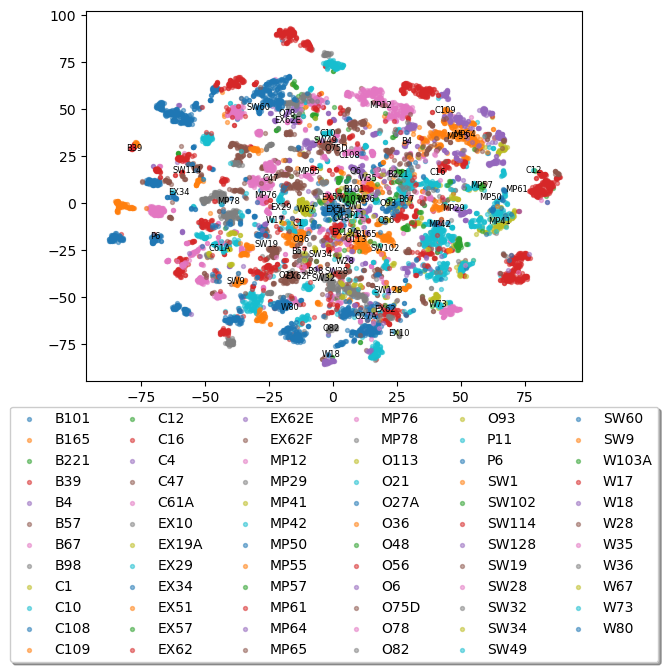

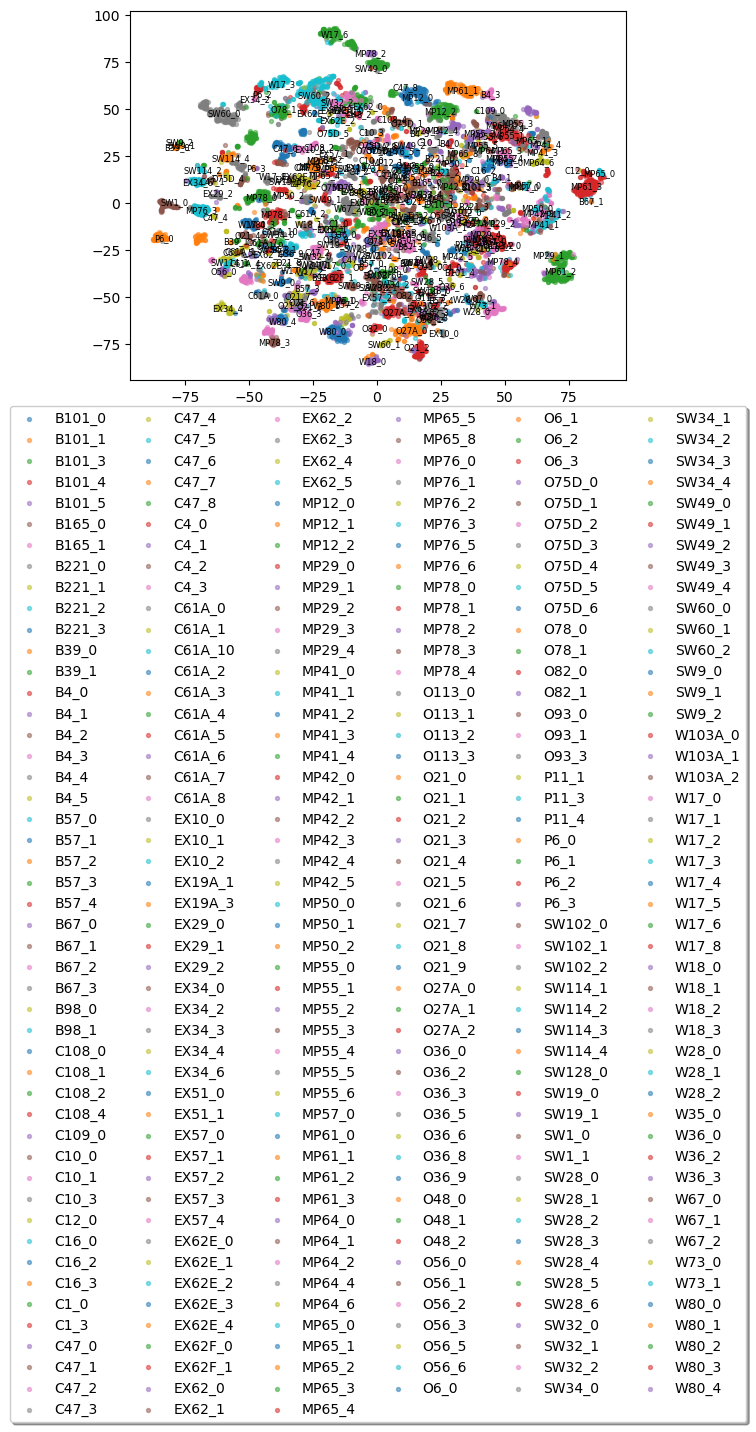

total label 71 ['B101' 'B165' 'B221' 'B39' 'B4' 'B57' 'B67' 'B98' 'C1' 'C10' 'C108'
 'C109' 'C12' 'C16' 'C4' 'C47' 'C61A' 'EX10' 'EX19A' 'EX29' 'EX34' 'EX51'
 'EX57' 'EX62' 'EX62E' 'EX62F' 'MP12' 'MP29' 'MP41' 'MP42' 'MP50' 'MP55'
 'MP57' 'MP61' 'MP64' 'MP65' 'MP76' 'MP78' 'O113' 'O21' 'O27A' 'O36' 'O48'
 'O56' 'O6' 'O75D' 'O78' 'O82' 'O93' 'P11' 'P6' 'SW1' 'SW102' 'SW114'
 'SW128' 'SW19' 'SW28' 'SW32' 'SW34' 'SW49' 'SW60' 'SW9' 'W103A' 'W17'
 'W18' 'W28' 'W35' 'W36' 'W67' 'W73' 'W80']
rand choosed label name 5 ['P11' 'SW114' 'B57' 'MP61' 'W28']
data choose from label (721, 2)
label choose from label (1, 721)
unique label type choose from label (19,)
unique label choose from label (5,)


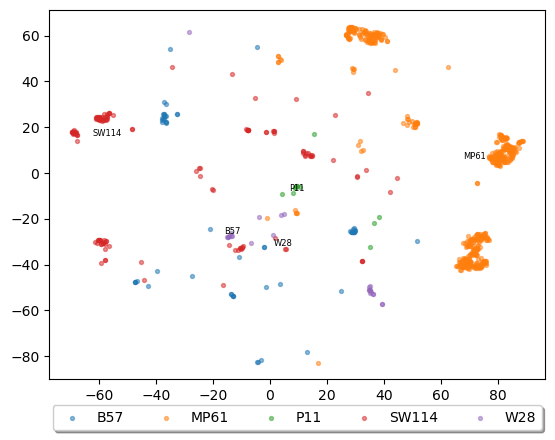

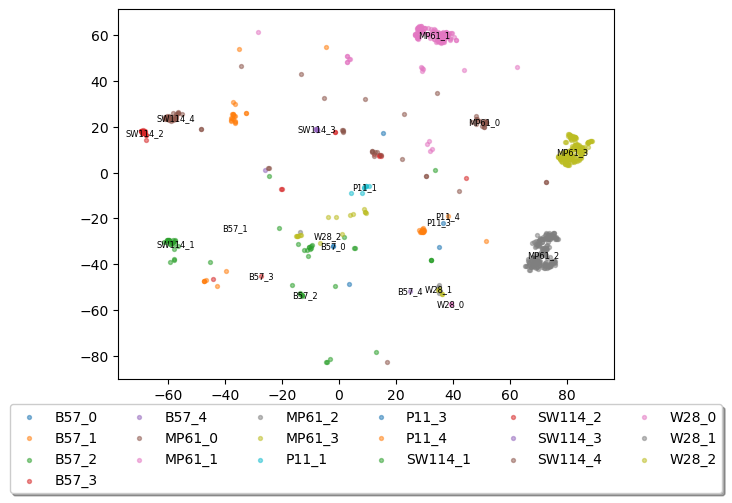

In [ ]:
# Get unique labels
# caller
total_cID = np.array(total_cID)
used_label = np.expand_dims(total_cID, axis=0)

# caller_class
total_ctID = np.array(total_ctID)
caller_type_label = np.expand_dims(total_ctID, axis=0)

# use data segment
# ran_data = True
ran_data = False
if ran_data:
    num_samples = 5000
    random.seed(0)
    rand = list(range(len(data_2d_speaker)))
    samples = random.sample(rand, num_samples)
    data_2d_spk_seg = data_2d_speaker[samples,]
    used_label_seg = used_label[:,samples]
    unique_labels = np.unique(used_label_seg)
else:
    # not random choose data segment
    data_2d_spk_seg = data_2d_speaker
    used_label_seg = used_label
    unique_labels = np.unique(used_label_seg)
    # print(data_2d_con.shape)
    # print(unique_labels.shape)
    # print(unique_labels)


# select data from data label
# random select
# num_label = 5
# num_label = 71

con_text = [False, True]
con_text = [True, True]
con_iter = iter(con_text) 

for num_label in [71, 5]: 
    random.seed(0)
    rand_label_num = list(range(len(unique_labels)))
    rand_label = random.sample(rand_label_num, num_label)
    used_label_index = unique_labels[rand_label]

    # choose label
    # used_label_index = ['B101', 'B165',  'B221',  'B39',  'B4', 'B57']
    # ['B101' 'B165' 'B221' 'B39' 'B4' 'B57' 'B67' 'B98' 'C1' 'C10' 'C108'
    #  'C109' 'C12' 'C16' 'C4' 'C47' 'C61A' 'EX10' 'EX19A' 'EX29' 'EX34' 'EX51'
    #  'EX57' 'EX62' 'EX62E' 'EX62F' 'MP12' 'MP29' 'MP41' 'MP42' 'MP50' 'MP55'
    #  'MP57' 'MP61' 'MP64' 'MP65' 'MP76' 'MP78' 'O113' 'O21' 'O27A' 'O36' 'O48'
    #  'O56' 'O6' 'O75D' 'O78' 'O82' 'O93' 'P11' 'P6' 'SW1' 'SW102' 'SW114'
    #  'SW128' 'SW19' 'SW28' 'SW32' 'SW34' 'SW49' 'SW60' 'SW9' 'W103A' 'W17'
    #  'W18' 'W28' 'W35' 'W36' 'W67' 'W73' 'W80']

    print('total label',len(np.unique(used_label)),np.unique(used_label))
    print('rand choosed label name',len(used_label_index),used_label_index)


    # mask to selected data label
    mask = np.isin(used_label_seg, used_label_index)
    # print(mask)
    indices = np.where(mask)[1]
    # print(indices)
    data_spk_label = data_2d_spk_seg[indices,]
    used_spk_label = used_label_seg[:,indices]
    used_spk_type_label = caller_type_label[:,indices]
    unique_spk_label = np.unique(used_spk_label)
    unique_spk_type_label = np.unique(used_spk_type_label)

    print('data choose from label',data_spk_label.shape)
    # print(data_spk_label)
    print('label choose from label',used_spk_label.shape)
    # print(used_spk_label)
    print('unique label type choose from label',unique_spk_type_label.shape)
    print('unique label choose from label',unique_spk_label.shape)
    # print(unique_spk_label)

    # paint index
    next_item = next(con_iter)
    
    for label in unique_spk_label:
        label_mask = np.all(used_spk_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    plt.show()


    for label in unique_spk_type_label:
        label_mask = np.all(used_spk_type_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        # centroid = np.mean(data_for_label, axis=0)
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    plt.show()

